# Thermal Comfort Classifier V2.2

What's new?
* Focusing on Extreme Gradiend Boosting

# Handling With Data

## Acquision

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)
# dataset = pd.read_csv("darjeeling.csv")

In [3]:
dataset.head()

,month,season,Location,sex,Subject Code,TSV,TP,air_ts,air_tp,RH_ts,...,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33,Unnamed: 32
0,1.0,1.0,S0135,1.0,FSL1,-1.0,-1,0,0,-1.0,...,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
1,1.0,1.0,S0135,1.0,FSL2,-1.0,-1,-1,0,1.0,...,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073,0.0
2,1.0,1.0,S0135,1.0,FSL3,-1.0,-1,-1,0,1.0,...,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110,0.0
3,1.0,1.0,S0135,1.0,FSL4,-1.0,-1,-1,0,1.0,...,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669,0.0
4,1.0,1.0,S0135,1.0,FSL5,0.0,0,0,0,0.0,...,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364,0.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         2608 non-null   float64
 1   season        2608 non-null   float64
 2   Location      2608 non-null   object 
 3   sex           2608 non-null   float64
 4   Subject Code  2608 non-null   object 
 5   TSV           2608 non-null   float64
 6   TP            2608 non-null   object 
 7   air_ts        2608 non-null   object 
 8   air_tp        2608 non-null   object 
 9   RH_ts         2608 non-null   float64
 10  RH_tp         2608 non-null   float64
 11  comfort       2608 non-null   object 
 12  prod          2608 non-null   object 
 13  TA            2608 non-null   object 
 14  clo           2608 non-null   float64
 15  Uphols        2608 non-null   object 
 16  clo_tot       2608 non-null   float64
 17  met           2608 non-null   float64
 18  sh_sw         2608 non-null 

## Cleaning

In [5]:
dataset.isnull().sum()

month            400
season           400
Location         400
sex              400
Subject Code     400
TSV              400
TP               400
air_ts           400
air_tp           400
RH_ts            400
RH_tp            400
comfort          400
prod             400
TA               400
clo              400
Uphols           400
clo_tot          400
met              400
sh_sw            400
Ti               400
Tg               400
Va               400
RH               400
PMV              400
PPD              400
TnG_R_0.5        400
Tmr              400
Top              400
Tout             400
Trm              400
TnG_R_0.25       400
TnG_R_0.33       400
Unnamed: 32     2438
dtype: int64

In [6]:
# Remove unnamed feature
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# remove Location and Subject Code
dataset.drop(['Location','Subject Code'], axis=1, inplace = True)

# Change object data type to numeric
objectFeatures = ['TP','air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']
for i in objectFeatures:
    dataset[i] = pd.to_numeric(dataset[i],errors = 'coerce')

In [7]:
dataset.isnull().sum()

month         400
season        400
sex           400
TSV           400
TP            401
air_ts        404
air_tp        404
RH_ts         400
RH_tp         400
comfort       403
prod          405
TA            435
clo           400
Uphols        450
clo_tot       400
met           400
sh_sw         492
Ti            400
Tg            400
Va            400
RH            400
PMV           400
PPD           400
TnG_R_0.5     400
Tmr           400
Top           400
Tout          400
Trm           400
TnG_R_0.25    400
TnG_R_0.33    400
dtype: int64

In [8]:
data = dataset.dropna()
data.head()

,month,season,sex,TSV,TP,air_ts,air_tp,RH_ts,RH_tp,comfort,...,RH,PMV,PPD,TnG_R_0.5,Tmr,Top,Tout,Trm,TnG_R_0.25,TnG_R_0.33
0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,4.0,...,49.1,0.768705,16.575062,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110
1,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,49.7,0.236143,6.148326,26.860770,25.521541,24.860770,18.5,19.238792,28.860770,27.891073
2,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,49.7,0.246064,6.246280,26.948807,25.797614,24.948807,18.5,19.238792,28.948807,27.979110
3,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,2.0,...,46.3,0.299259,6.838386,26.843366,25.786732,24.843366,18.5,19.238792,28.843366,27.873669
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,46.5,-0.444504,9.015203,24.755364,25.510728,24.755364,18.5,19.238792,24.755364,24.755364


In [9]:
features_name = data.columns

# Data Exploration 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('bmh')

<AxesSubplot:>

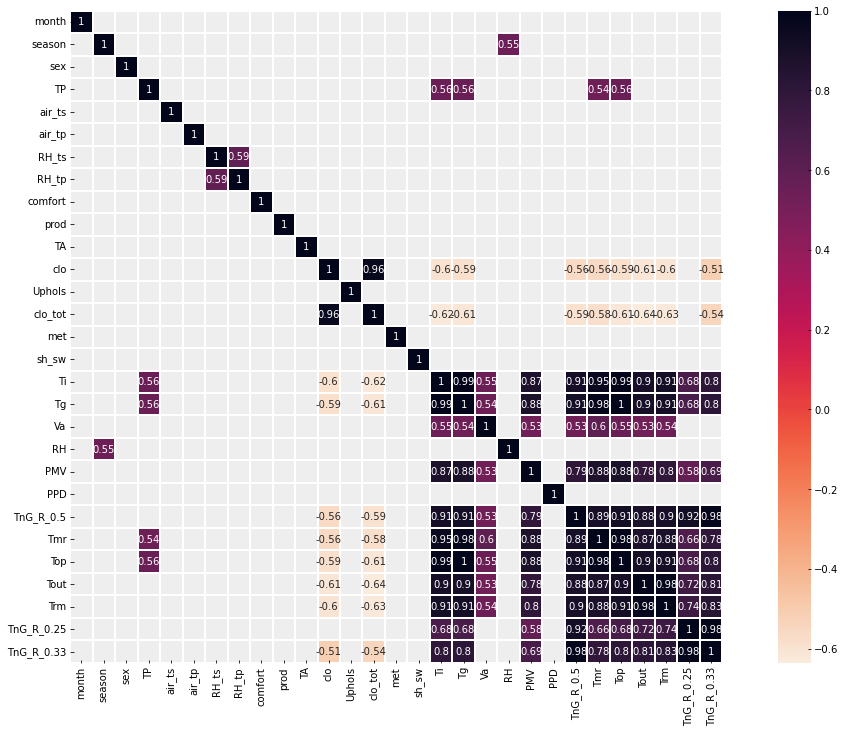

In [11]:
plt.figure(figsize=(20,12))
corr = data.drop('TSV', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], annot=True, 
            cmap='rocket_r', linewidths=0.1, square=True)

In [12]:
#Correlation with output variable
# cor_target = abs(cor["TSV"])
corr_target = data.corr()['TSV']

#Selecting highly correlated features
relevant_features = corr_target[abs(corr_target) >= 0.3]
relevant_features

TSV           1.000000
TP            0.489386
sh_sw         0.304330
Ti            0.336710
Tg            0.348942
PMV           0.338905
Tmr           0.353391
Top           0.349318
TnG_R_0.25   -0.448108
Name: TSV, dtype: float64

# Modeling

C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='TSV', ylabel='count'>

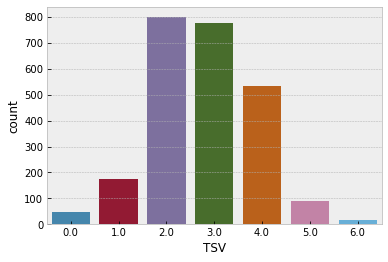

In [13]:
data.TSV.replace({-3 : 0,
                  -2 : 1,
                  -1 : 2,
                   0 : 3,
                   1 : 4,
                   2 : 5,
                   3 : 6}, inplace=True)

sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

from sklearn.inspection import _permutation_importance

## Splitting

In [15]:
y = data[['TSV']]
X = data.drop(['TSV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training shape : {X_train.shape}, {y_train.shape}")
print(f"Testing shape  : {X_test.shape}, {y_test.shape}")

features_name = X_train.columns

Training shape : (1703, 29), (1703, 1)
Testing shape  : (731, 29), (731, 1)


## XGBoost Classifier

In [16]:
# import sys
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install xgboost

# import keras
from xgboost import XGBClassifier

In [23]:
model = XGBClassifier()
clf_xgb = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Peformance

In [25]:
def peformance_report(X_train, y_train, X_test, y_test, y_pred, clf):
    trainAccuracy = accuracy_score(y_train, clf.predict(X_train))
    
    # trainReport = classification_report(y_train, y_pred)
#     y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testReport = classification_report(y_test, y_pred)
    
    # error
    error_mse = mean_squared_error(y_test, y_pred)
    error_mae = mean_absolute_error(y_test, y_pred)
    error_mape= mean_absolute_percentage_error(y_test, y_pred)

    print("Peformance")
    print(f"Training accuracy : {trainAccuracy}")
    # print(f"Report :\n{trainReport}")
    print("-----")
    print("Testing Accuracy  : ")
    print(f"Testing accuracy : {testAccuracy}\n")
    print(f"MSE   : {error_mse}")
    print(f"MAE   : {error_mae}")
    print(f"MAPE  : {error_mape}")
    print(f"Report :\n{testReport}")

peformance_report(X_train, y_train, X_test, y_test, y_pred, clf_xgb)
# print(y_pred)

Peformance
Training accuracy : 1.0
-----
Testing Accuracy  : 
Testing accuracy : 0.9699042407660738

MSE   : 0.03419972640218878
MAE   : 0.03146374829001368
MAPE  : 18482625009728.45
Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.88      0.91        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      0.99      0.99       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.79      0.85        33
         6.0       0.33      0.33      0.33         3

    accuracy                           0.97       731
   macro avg       0.87      0.83      0.85       731
weighted avg       0.97      0.97      0.97       731



In [ ]:
# param_range = np.arange(0, 0.3, 0.01)

# train_score, test_score = validation_curve(model, X, y, param_name="learning_rate",
#                                           param_range = param_range, cv=3, scoring="accuracy",
#                                           n_jobs=-1)

# train_mean = np.mean(train_score, axis=1)
# train_std = np.std(train_score, axis=1)

# test_mean = np.mean(test_score, axis=1)
# test_std = np.std(test_score, axis=1)

# # plot
# plt.plot(param_range, train_mean, label="Training score")
# plt.plot(param_range, test_mean, label="CV score")

# plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="grey")
# plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# plt.title("Validation Curve")
# plt.xlabel("Number of Trees")
# plt.ylabel("Accuracy Score")
# plt.legend(loc="best")
# plt.show()

### Confusion Matrix

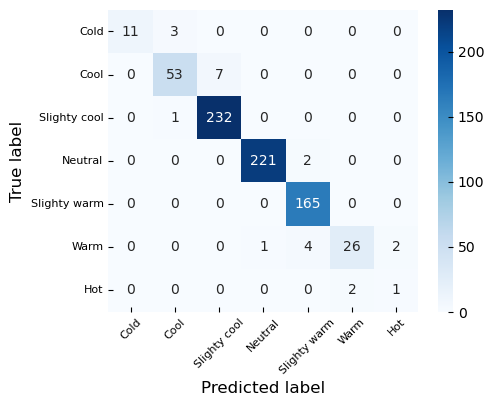

In [26]:
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    # sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    # ax.set_xticklabels(labels=[-3,-2,-1,0,1,2,3])
    # ax.set_yticklabels(labels=[-3,-2,-1,0,1,2,3], rotation=0)
    ax.set_xticklabels(labels=["Cold", "Cool", "Slighty cool", "Neutral", "Slighty warm", "Warm", "Hot"], size=8, rotation=45)
    ax.set_yticklabels(labels=["Cold", "Cool", "Slighty cool", "Neutral", "Slighty warm", "Warm", "Hot"], size=8, rotation=0)

confusion(y_test, y_pred)

### Feature Importance

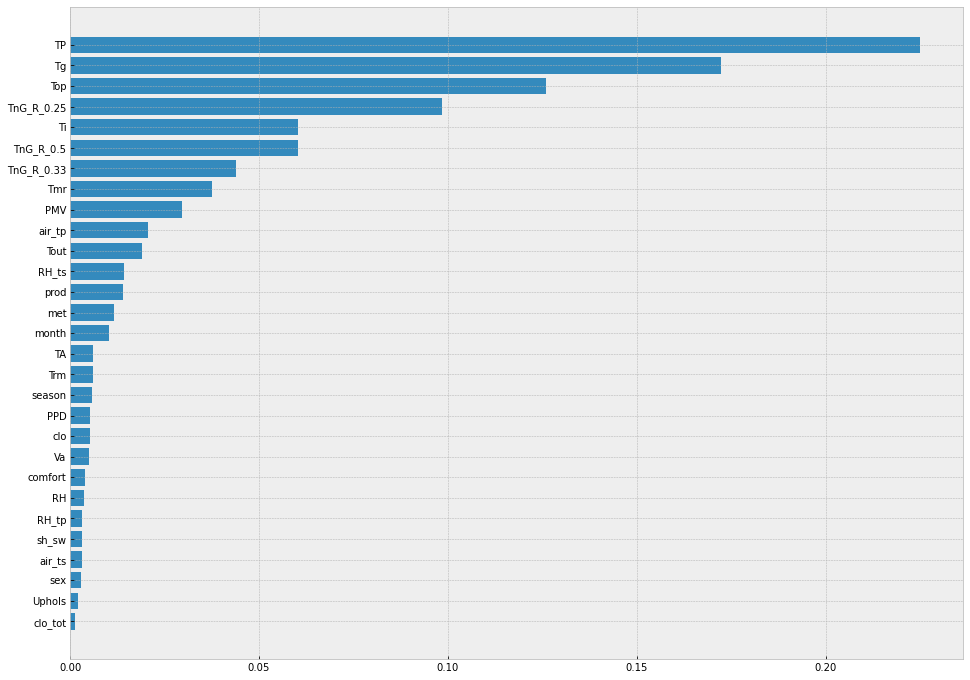

In [31]:
def importance(clf):
    fig, ax = plt.subplots(figsize=(16,12))
    # plot = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
    results = pd.DataFrame({'Features': features_name,
                            'Importances': clf.feature_importances_})
    results.sort_values(by='Importances', inplace=True)
    ax = plt.barh(results['Features'], results['Importances'])
    # plt.xlabel('Importance percentages')
    # ax.set_title('Feature Importance')
    # plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()
    
importance(clf_xgb)

## Hyperparameter Tuning

In [ ]:
# hyperparameter combination
parameters = {"learning_rate": [0.1, 0.01, 0.001],
              "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
              "max_depth": [2, 4, 7, 10],
              "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
              "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
              "reg_alpha": [0, 0.5, 1],
              "reg_lambda": [1, 1.5, 2, 3, 4.5],
              "min_child_weight": [1, 3, 5, 7],
              "n_estimators": [100, 250, 500, 1000]}

# RandomizedSearch Model
model_random_search = RandomizedSearchCV(estimator=model,
                                         param_distributions=parameters,
                                         n_iter=10)
# clf_random_search = model_random_search.fit(X_train, y_train)

In [ ]:
y_pred_random = clf_random_search.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Accuracy (Randomize Search Model) : {accuracy_random}")
print(f"Best hyperparameter :\n{model_random_search.best_params_}")

## Support Vector Machine Classifier

In [28]:
from sklearn.svm import SVC

model = SVC()
clf_svm = model.fit(X_train, y_train.values.ravel())
y_pred = clf_svm.predict(X_test)

In [29]:
peformance_report(X_train, y_train, X_test, y_test, y_pred, clf_svm)

Peformance
Training accuracy : 0.8667058132706987
-----
Testing Accuracy  : 
Testing accuracy : 0.8440492476060192

MSE   : 0.22571819425444598
MAE   : 0.17920656634746923
MAPE  : 172504500090798.84
Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.76      1.00      0.86       233
         3.0       1.00      0.99      0.99       223
         4.0       0.81      0.99      0.89       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.84       731
   macro avg       0.37      0.43      0.39       731
weighted avg       0.73      0.84      0.78       731



C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


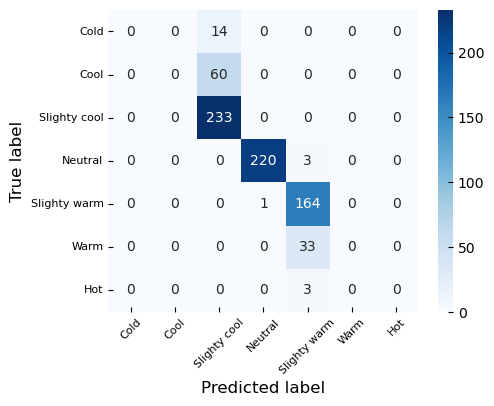

In [30]:
confusion(y_test, y_pred)

In [33]:
# importance(clf_svm)